# Training Results

In [1]:
# import relevant packages
import re 
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

In [2]:
def parser(file_path):
    """
    Parses a CycleGAN-style training log file and returns a DataFrame containing
    only the last recorded result for each epoch. Also aggregates total time per epoch.

    Parameters:
    -----------
    file_path : str
        Path to the training log text file.

    Returns:
    --------
    pd.DataFrame
        A DataFrame with one row per epoch, each representing the final log entry
        of that epoch, with total computation time for the epoch.
        Columns include:
            - epoch (int)
            - iters (int)
            - time (float): total computation time for the epoch
            - data (float): from last iteration
            - D_A, G_A, cycle_A, idt_A (floats): loss values for domain A
            - D_B, G_B, cycle_B, idt_B (floats): loss values for domain B
    """
    pattern = re.compile(
        r"\(epoch: (\d+), iters: (\d+), time: ([\d.]+), data: ([\d.]+)\)\s+"
        r"D_A: ([\d.]+) G_A: ([\d.]+) cycle_A: ([\d.]+) idt_A: ([\d.]+) "
        r"D_B: ([\d.]+) G_B: ([\d.]+) cycle_B: ([\d.]+) idt_B: ([\d.]+)"
    )
    
    data = []

    with open(file_path, 'r') as f:
        for line in f:
            match = pattern.search(line)
            if match:
                values = list(map(float, match.groups()))
                row = {
                    'epoch': int(values[0]),
                    'iters': int(values[1]),
                    'time': values[2],
                    'data': values[3],
                    'D_A': values[4],
                    'G_A': values[5],
                    'cycle_A': values[6],
                    'idt_A': values[7],
                    'D_B': values[8],
                    'G_B': values[9],
                    'cycle_B': values[10],
                    'idt_B': values[11],
                }
                data.append(row)

    df = pd.DataFrame(data)

    if not df.empty:

        # Keep last record per epoch
        df_last = df.sort_values(['epoch', 'iters']).groupby('epoch', as_index=False).last()

    return df_last

In [3]:
def loss_plot(df, title):
    """
    Plots line graphs for all loss metrics in the given DataFrame
    and prints the total training time.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame returned from `parser`, containing training logs
        with loss metrics and 'total_time' per epoch.

    Returns:
    --------
    None
    """
    # Columns to exclude from plotting
    exclude = {'epoch', 'iters', 'data', 'time'}

    # Loss columns only
    loss_columns = [col for col in df.columns if col not in exclude]

    # Plot
    plt.figure(figsize=(12, 6))
    for col in loss_columns:
        plt.plot(df['epoch'], df[col], marker='o', markersize = 3, label=col)

    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.title(f'Training Loss Metrics Per Epoch: {title}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Vangogh2Face

**Training Loss**

In [4]:
vangogh_path = 'checkpoints/vangogh2face/loss_log.txt'

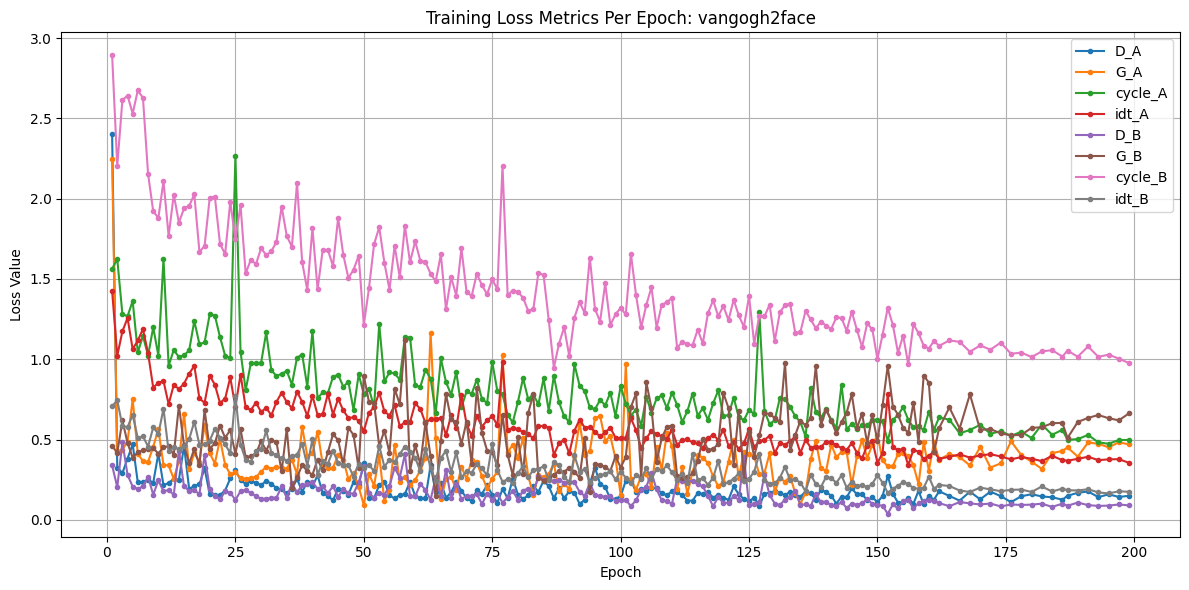

In [5]:
vangogh_results = parser(vangogh_path)
loss_plot(vangogh_results,'vangogh2face')

**Testing Results**

In [10]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot datasets/datasets/vangogh2face --name vangogh2face --model cycle_gan --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/datasets/vangogh2face	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0               

## monet2face

**Training Loss**

In [7]:
monet_path = "checkpoints/monet2face/loss_log.txt"
monet_results = parser(monet_path)

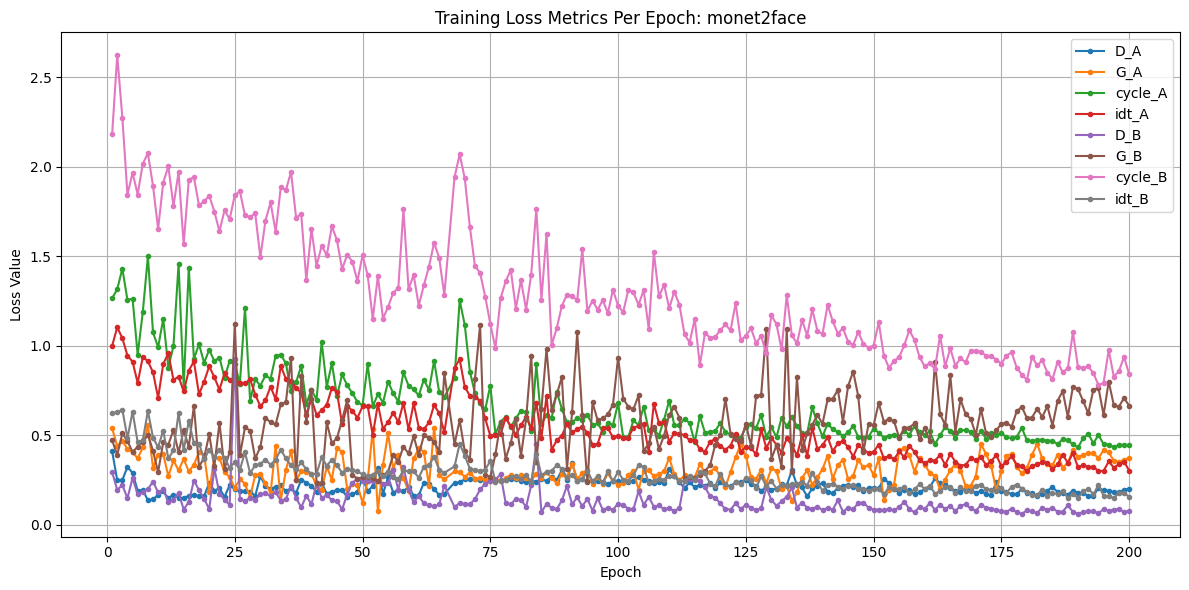

In [9]:
loss_plot(monet_results,'monet2face')

**Testing Results**

In [12]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot datasets/datasets/monet2face --name monet2face --model cycle_gan --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/datasets/monet2face  	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0               

## ukiyoe2face

**Training Loss**

In [13]:
ukiyoe_path = 'checkpoints/ukiyoe2face/loss_log.txt'

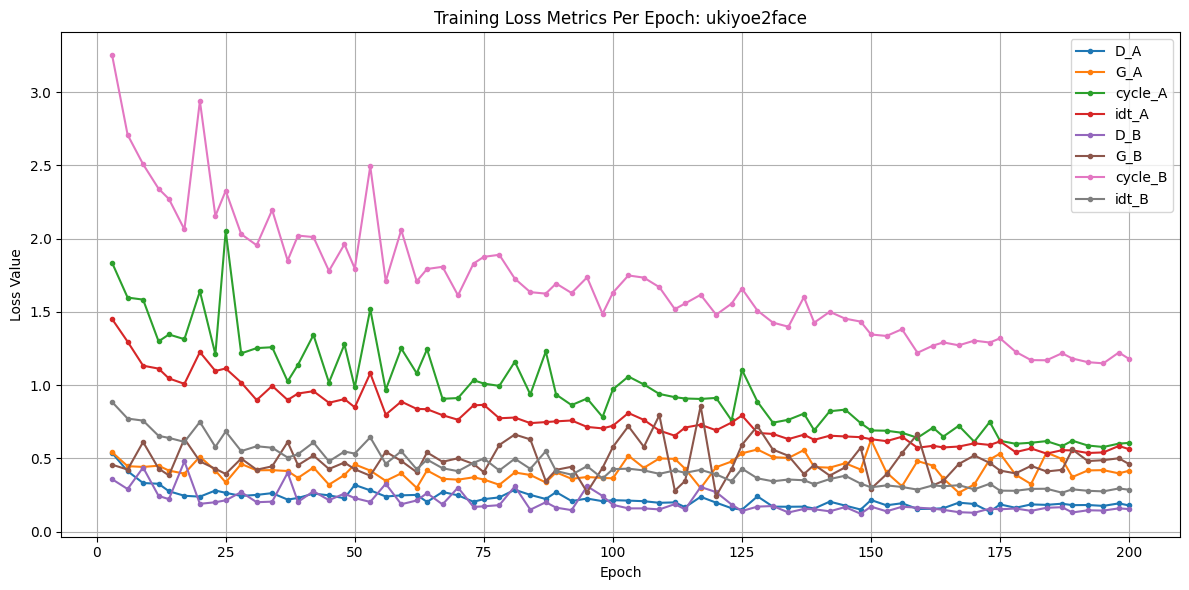

In [15]:
ukiyoe_results = parser(ukiyoe_path)
loss_plot(ukiyoe_results,'ukiyoe2face')

**Testing Results**

In [16]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot datasets/datasets/ukiyoe2face --name ukiyoe2face --model cycle_gan --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/datasets/ukiyoe2face 	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0               

### Style-Transfer Results

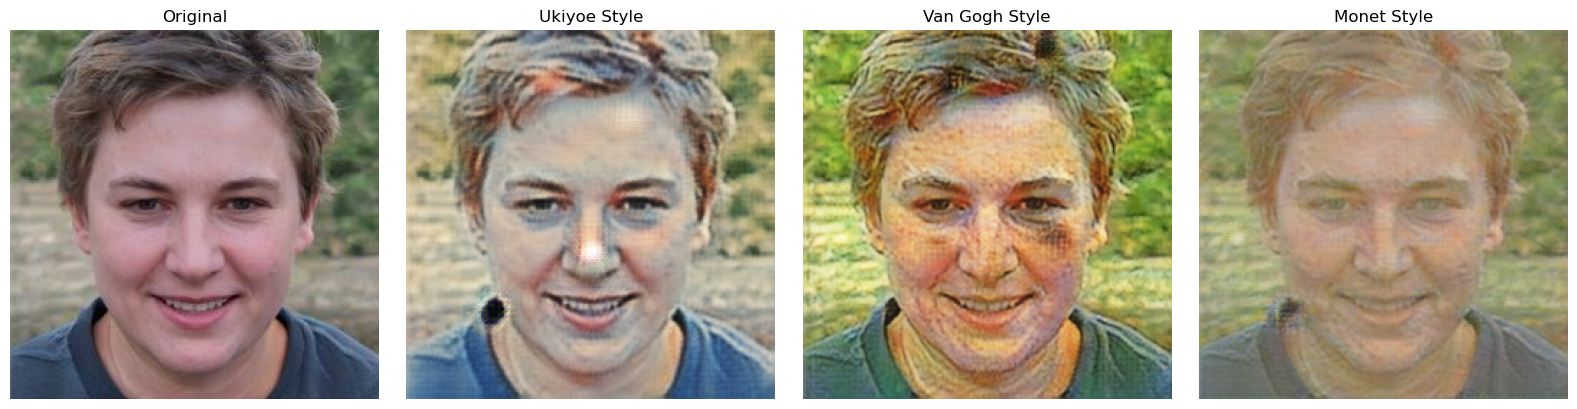

In [2]:
# ukiyoe 1203, vangogh 0007, monet 0010
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define image paths
original_path = 'results/ukiyoe2face/test_latest/images/01203_real_B.png'  # or 0007_real_B / 0010_real_B, they're the same
ukiyoe_path = 'results/ukiyoe2face/test_latest/images/01203_rec_B.png'
vangogh_path = 'results/vangogh2face/test_latest/images/00007_rec_B.png'
monet_path = 'results/monet2face/test_latest/images/00010_rec_B.png'

# Load images
original = mpimg.imread(original_path)
ukiyoe = mpimg.imread(ukiyoe_path)
vangogh = mpimg.imread(vangogh_path)
monet = mpimg.imread(monet_path)

# Plot
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
titles = ['Original', 'Ukiyoe Style', 'Van Gogh Style', 'Monet Style']
images = [original, ukiyoe, vangogh, monet]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def show_recA_recB(base_path, styles, image_ids):
    """
    Display real_A, rec_A, real_B, rec_B images for multiple styles.
    
    Args:
        base_path (str): Base directory containing all style folders.
        styles (list): List of style folder names (e.g., ['ukiyoe2face', 'vangogh2face', 'monet2face']).
        image_ids (dict): Dictionary mapping style -> image ID, e.g., {'ukiyoe2face': '1203', ...}
    """
    num_styles = len(styles)
    fig, axes = plt.subplots(num_styles, 4, figsize=(16, 4 * num_styles))

    if num_styles == 1:
        axes = [axes]  # handle 1-row case

    for row, style in enumerate(styles):
        img_id = image_ids[style]
        folder = os.path.join(base_path, style, 'test_latest', 'images')
        
        paths = {
            'real_A': os.path.join(folder, f'{img_id}_real_A.png'),
            'rec_A': os.path.join(folder, f'{img_id}_rec_A.png'),
            'real_B': os.path.join(folder, f'{img_id}_real_B.png'),
            'rec_B': os.path.join(folder, f'{img_id}_rec_B.png')
        }

        for col, (label, path) in enumerate(paths.items()):
            img = mpimg.imread(path)
            ax = axes[row][col]
            ax.imshow(img)
            ax.set_title(f'{style} - {label}', fontsize=10)
            ax.axis('off')

    plt.tight_layout()
    plt.show()


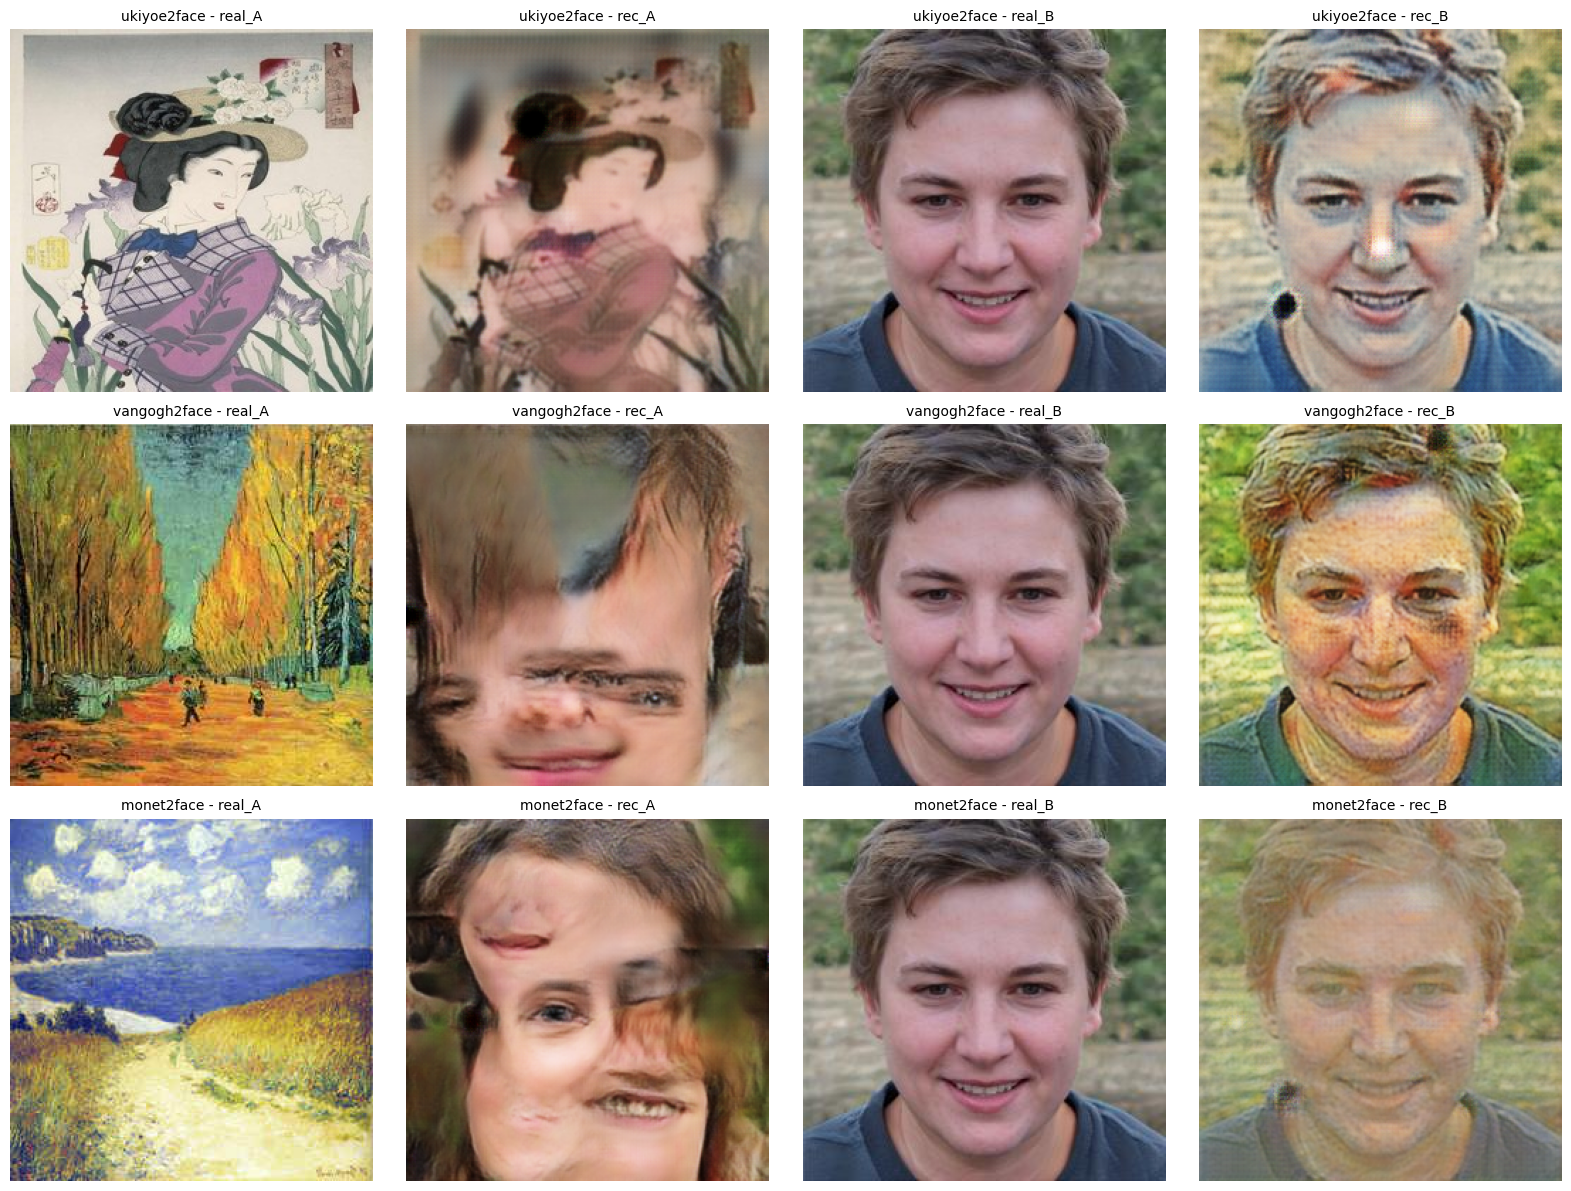

In [4]:
base_path = 'results'
styles = ['ukiyoe2face', 'vangogh2face', 'monet2face']
image_ids = {
    'ukiyoe2face': '01203',
    'vangogh2face': '00007',
    'monet2face': '00010'
}

show_recA_recB(base_path, styles, image_ids)